In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
day = "/content/drive/MyDrive/Colab Notebooks/day.csv"
dataset_day = open(day, "r")

In [ ]:
import pandas as pd
dataset_day = pd.read_csv(dataset_day)

In [ ]:
print(dataset_day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
print(dataset_day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [ ]:
dataset_day_forecast = dataset_day.drop(['casual', 'registered'], axis=1)

In [ ]:
print(dataset_day_forecast.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [ ]:
dataset_day_forecast

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [ ]:
from matplotlib import pyplot

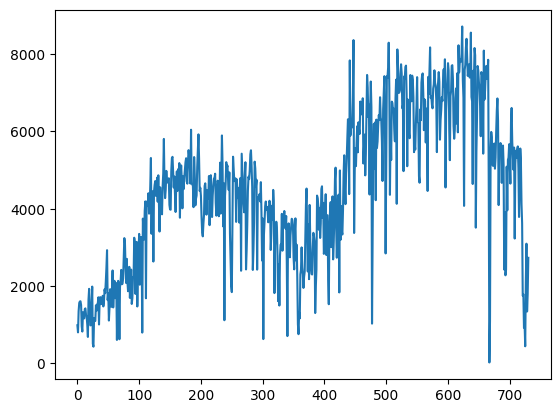

In [ ]:
pyplot.plot (dataset_day_forecast['cnt'])

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

deccnt = seasonal_decompose(dataset_day_forecast['cnt'], period = 12)

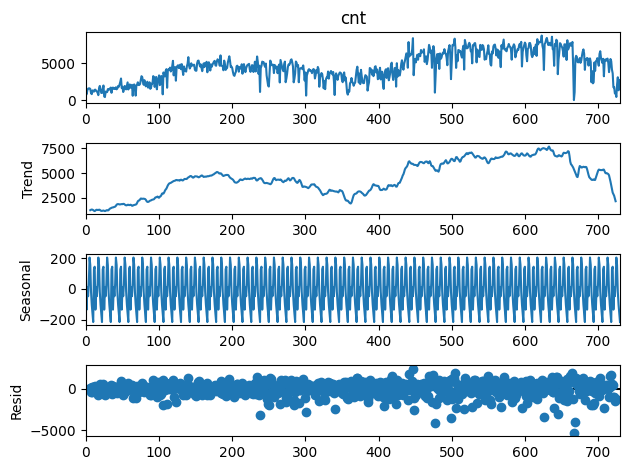

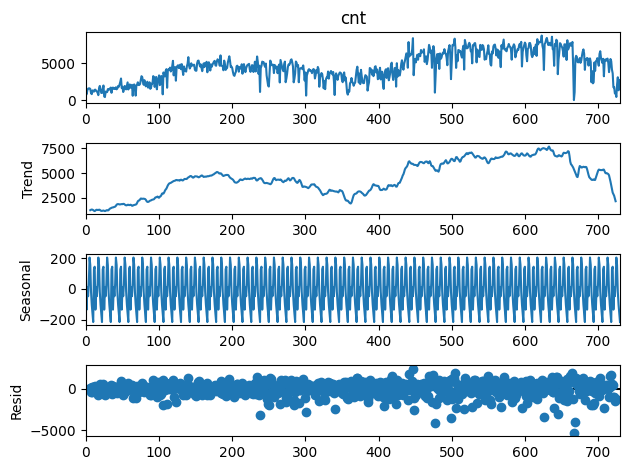

In [ ]:
deccnt.plot()

In [ ]:
y = dataset_day_forecast['cnt']

dataset_day_forecast2 = dataset_day_forecast.drop(['cnt', 'dteday'], axis=1)

X_dummies = pd.get_dummies(dataset_day_forecast2, columns=['yr', 'mnth', 'weekday'])

In [ ]:
X_dummies

,instant,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,yr_0,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,1,0,0,2,0.344167,0.363625,0.805833,0.160446,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,0,2,0.363478,0.353739,0.696087,0.248539,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1,...,0,0,0,0,1,0,0,0,0,0
3,4,1,0,1,1,0.200000,0.212122,0.590435,0.160296,1,...,0,0,0,0,0,1,0,0,0,0
4,5,1,0,1,1,0.226957,0.229270,0.436957,0.186900,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,0,1,2,0.254167,0.226642,0.652917,0.350133,0,...,0,0,1,0,0,0,0,1,0,0
727,728,1,0,1,2,0.253333,0.255046,0.590000,0.155471,0,...,0,0,1,0,0,0,0,0,1,0
728,729,1,0,0,2,0.253333,0.242400,0.752917,0.124383,0,...,0,0,1,0,0,0,0,0,0,1
729,730,1,0,0,1,0.255833,0.231700,0.483333,0.350754,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_dummies, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, train_size=0.8, test_size=0.2)

pd.DataFrame({"Parámetro":X_dummies.columns, "Coeficiente":lr.coef_})



,Parámetro,Coeficiente
0,instant,-6.753902
1,season,522.374413
2,holiday,-360.247548
3,workingday,224.747197
4,weathersit,-636.920686
5,temp,2375.174887
6,atemp,2118.548046
7,hum,-1386.951935
8,windspeed,-3024.168297
9,yr_0,-2257.451260


MAE: 565.5661757756898


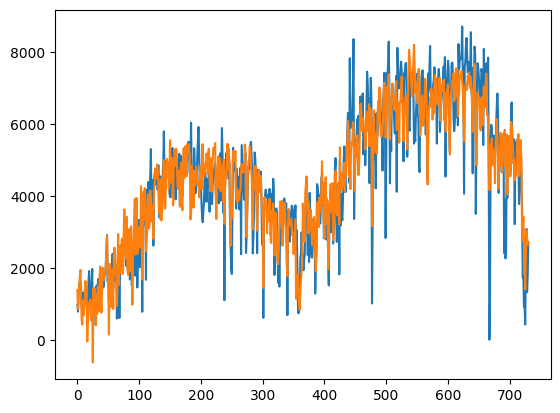

In [ ]:
mae = (abs(y - lr.predict(X_dummies))).mean()

print("MAE: " + str(mae))

pyplot.plot(y)

pyplot.plot(lr.predict(X_dummies))

In [ ]:
sum(y)

3292679

In [ ]:
from sklearn.metrics import r2_score

r2_score(y, lr.predict(X_dummies))

0.8409358431117393

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
rf = RandomForestRegressor(random_state=42, max_depth=15)

rf.fit(X_dummies, y)

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, train_size=0.8, test_size=0.2)

MAE: 169.16718004522147


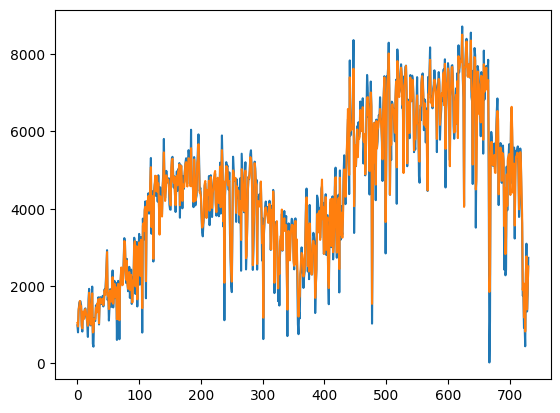

In [ ]:
mae = (abs(y - rf.predict(X_dummies))).mean()

print("MAE: " + str(mae))

pyplot.plot(y)

pyplot.plot(rf.predict(X_dummies))

In [ ]:
r2_score(y, rf.predict(X_dummies))

0.9830683578612497

In [ ]:
gb = GradientBoostingRegressor(random_state=42, max_depth=9)

gb.fit(X_dummies, y)

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, train_size=0.8, test_size=0.2)

MAE: 3.9483739718881714


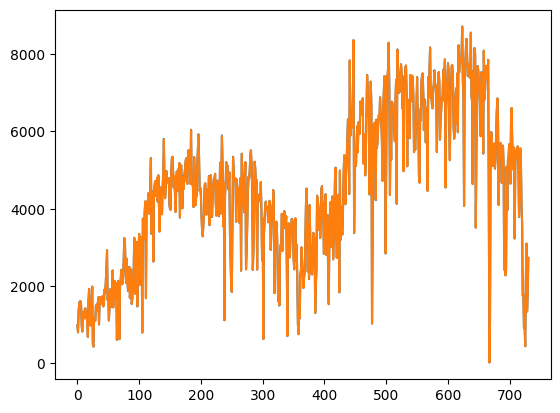

In [ ]:
mae = (abs(y - gb.predict(X_dummies))).mean()

print("MAE: " + str(mae))

pyplot.plot(y)

pyplot.plot(gb.predict(X_dummies))

In [ ]:
r2_score(y, gb.predict(X_dummies))

0.9999927273063248